In [6]:
import csv
import pandas as pd
import numpy as np
df = pd.read_excel("C:/Users/Godfr/Documents/US/IntroToBA/HW3/HW3.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
sequence_number         2000 non-null int64
US                      2000 non-null int64
source_a                2000 non-null int64
source_c                2000 non-null int64
source_b                2000 non-null int64
source_d                2000 non-null int64
source_e                2000 non-null int64
source_m                2000 non-null int64
source_o                2000 non-null int64
source_h                2000 non-null int64
source_r                2000 non-null int64
source_s                2000 non-null int64
source_t                2000 non-null int64
source_u                2000 non-null int64
source_p                2000 non-null int64
source_x                2000 non-null int64
source_w                2000 non-null int64
Freq                    2000 non-null int64
last_update_days_ago    2000 non-null int64
1st_update_days_ago     2000 non-null int64
Web order    

In [17]:
y=df['Spending']
X=df.iloc[:,1:23]
X.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,3662,3662,1,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2900,2900,1,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3883,3914,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,829,829,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,869,869,0,0,0


In [23]:
y.describe()

count    2000.000000
mean      102.560745
std       186.749816
min         0.000000
25%         0.000000
50%         1.855000
75%       152.532500
max      1500.060000
Name: Spending, dtype: float64

Text(0.5,1,'Histogram of Log of Price')

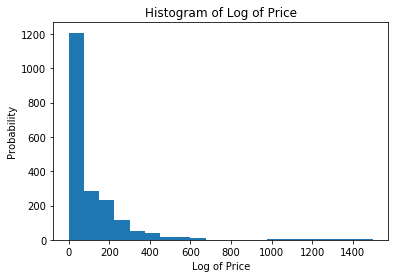

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y, bins = 20)
plt.xlabel('Log of Price')
plt.ylabel('Probability')
plt.title('Histogram of Log of Price')

In [19]:
# Split dataset for holdout testing

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=40) # 30% of data for test

In [21]:
np.random.seed(42) # set default random seed generator for consistent results

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# specify gridsearch
tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), scoring='neg_mean_squared_error',
                  param_grid=[{'max_depth': range(3,12,1), 
                              'min_samples_leaf':[50,100,200],
                              'max_leaf_nodes':range(8,26,2)}],
                  cv=10,
                  n_jobs=4)
tree = tree.fit(X_train, y_train)
print('Best tree MSE: %.4f'% (-tree.best_score_))
print('Best parameters:', tree.best_params_)

Best tree MSE: 20803.3397
Best parameters: {'max_depth': 8, 'max_leaf_nodes': 18, 'min_samples_leaf': 50}


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# fit final tree and get predictions
tree_final = tree.best_estimator_.fit(X_train,y_train)

# apply model to training and test data
y_pred_tree_train = tree_final.predict(X_train) # Apply model to train data
y_pred_tree_test = tree_final.predict(X_test)   # Apply model to test data

# get root mean squared error
rmse_tree_train = np.sqrt(mean_squared_error(y_train, y_pred_tree_train))
rmse_tree_test = np.sqrt(mean_squared_error(y_test, y_pred_tree_test))

# get mean absolute error
mae_tree_train = mean_absolute_error(y_train, y_pred_tree_train)
mae_tree_test = mean_absolute_error(y_test, y_pred_tree_test)

# get explained variance score
evar_tree_train = explained_variance_score(y_train, y_pred_tree_train)
evar_tree_test = explained_variance_score(y_test, y_pred_tree_test)

# print performance results

print('Decision Tree Performance Results')
print('Root mean squared error (RMSE): train: %.3f, test: %.3f' % (rmse_tree_train, rmse_tree_test))
print('Mean absolute error (MAE): train: %.3f, test: %.3f' % (mae_tree_train, mae_tree_test))
print('Explained variance score: train: %.3f, test: %.3f' % (evar_tree_train, evar_tree_test))

Decision Tree Performance Results
Root mean squared error (RMSE): train: 137.965, test: 149.437
Mean absolute error (MAE): train: 70.248, test: 81.786
Explained variance score: train: 0.457, test: 0.348


In [38]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesRegressor(n_estimators=10)
clf = clf.fit(X_train, y_train)
clf.feature_importances_;
model = SelectFromModel(clf, prefit=True)
X_train_lim = model.transform(X_train) # feature subset for k-nn training
X_test_lim = model.transform(X_test) # feature subset for k-nn testing

# check how many features have been reduced
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train_lim)
X_train_std = sc.transform(X_train_lim)
X_test_std = sc.transform(X_test_lim)

print('Training data shape before feature selection:', X_train.shape)
print('Training data shape after feature selection:', X_train_lim.shape)
print('Test data shape before feature selection:', X_test.shape)
print('Test data shape after feature selection:', X_test_lim.shape)

Training data shape before feature selection: (1400, 22)
Training data shape after feature selection: (1400, 4)
Test data shape before feature selection: (600, 22)
Test data shape after feature selection: (600, 4)


C:\App\anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
from sklearn.neighbors import KNeighborsRegressor

knn = GridSearchCV(estimator=KNeighborsRegressor(p=2, metric='minkowski', weights='distance'),
                   param_grid=[{'n_neighbors': range(1,30,1)}],
                                scoring='neg_mean_squared_error',
                   cv=10,
                   n_jobs=4)
knn = knn.fit(X_train_std, y_train)
print('Best knn MSE: %.4f'% (-knn.best_score_))
print('Best parameters:', knn.best_params_)

Best knn MSE: 15739.3692
Best parameters: {'n_neighbors': 8}


In [42]:
knn_final = knn.best_estimator_.fit(X_train_std,y_train)

# apply model to training and test data
y_pred_knn_train = knn_final.predict(X_train_std) # Apply model to train data
y_pred_knn_test = knn_final.predict(X_test_std)   # Apply model to test data
# evaluate model performance

# get root mean squared error
rmse_knn_train = np.sqrt(mean_squared_error(y_train, y_pred_knn_train))
rmse_knn_test = np.sqrt(mean_squared_error(y_test, y_pred_knn_test))

# get mean absolute error
mae_knn_train = mean_absolute_error(y_train, y_pred_knn_train)
mae_knn_test = mean_absolute_error(y_test, y_pred_knn_test)

# get explained variance score
evar_knn_train = explained_variance_score(y_train, y_pred_knn_train)
evar_knn_test = explained_variance_score(y_test, y_pred_knn_test)
# print performance results

print('k-NN regression Performance Results')
print('Root mean squared error (RMSE): train: %.3f, test: %.3f' % (rmse_knn_train, rmse_knn_test))
print('Mean absolute error (MAE): train: %.3f, test: %.3f' % (mae_knn_train, mae_knn_test))
print('Explained variance score: train: %.3f, test: %.3f' % (evar_knn_train, evar_knn_test))

k-NN regression Performance Results
Root mean squared error (RMSE): train: 18.060, test: 131.833
Mean absolute error (MAE): train: 4.488, test: 73.903
Explained variance score: train: 0.991, test: 0.497


In [49]:
from sklearn.linear_model import Lasso

lasso = GridSearchCV(estimator=Lasso(random_state=42),
                     param_grid= [{'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1,  10, 100, 1000,10000]}],
                     scoring='neg_mean_squared_error',
                     cv=10, iid=False,
                     n_jobs=4)
lasso = lasso.fit(X_train, y_train)
print('Best lasso MSE: %.4f'% (-lasso.best_score_))
print('Best parameters:', lasso.best_params_)

Best lasso MSE: 16637.8666
Best parameters: {'alpha': 0.1}


In [50]:
lasso_final = lasso.best_estimator_.fit(X_train,y_train)

# apply model to training and test data
y_pred_lasso_train = lasso_final.predict(X_train) # Apply model to train data
y_pred_lasso_test = lasso_final.predict(X_test)   # Apply model to test data


# get root mean squared error
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

# get mean absolute error
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

# get explained variance score
evar_lasso_train = explained_variance_score(y_train, y_pred_lasso_train)
evar_lasso_test = explained_variance_score(y_test, y_pred_lasso_test)

print('Lasso regression Performance Results')
print('Root mean squared error (RMSE): train: %.3f, test: %.3f' % (rmse_lasso_train, rmse_lasso_test))
print('Mean absolute error (MAE): train: %.3f, test: %.3f' % (mae_lasso_train, mae_lasso_test))
print('Explained variance score: train: %.3f, test: %.3f' % (evar_lasso_train, evar_lasso_test))

Lasso regression Performance Results
Root mean squared error (RMSE): train: 127.178, test: 125.237
Mean absolute error (MAE): train: 76.169, test: 80.615
Explained variance score: train: 0.538, test: 0.543


In [47]:
# setup grid search cross-validation for ridge regression

from sklearn.linear_model import Ridge

ridge = GridSearchCV(estimator=Ridge(random_state=42),
                     param_grid= [{'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1,  10, 100, 1000,10000]}],
                     scoring='neg_mean_squared_error',
                     cv=10, iid=False,
                     n_jobs=-1)
ridge = ridge.fit(X_train, y_train)
print('Best ridge MSE: %.4f'% (-ridge.best_score_))
print('Best parameters:', ridge.best_params_)

Best ridge MSE: 16619.7984
Best parameters: {'alpha': 10}


In [48]:
ridge_final = ridge.best_estimator_.fit(X_train,y_train)

# apply model to training and test data
y_pred_ridge_train = ridge_final.predict(X_train) # Apply model to train data
y_pred_ridge_test = ridge_final.predict(X_test)   # Apply model to test data

# get root mean squared error
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

# get mean absolute error
mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)

# get explained variance score
evar_ridge_train = explained_variance_score(y_train, y_pred_ridge_train)
evar_ridge_test = explained_variance_score(y_test, y_pred_ridge_test)

print('Ridge regression Performance Results')
print('Root mean squared error (RMSE): train: %.3f, test: %.3f' % (rmse_ridge_train, rmse_ridge_test))
print('Mean absolute error (MAE): train: %.3f, test: %.3f' % (mae_ridge_train, mae_ridge_test))
print('Explained variance score: train: %.3f, test: %.3f' % (evar_ridge_train, evar_ridge_test))

Ridge regression Performance Results
Root mean squared error (RMSE): train: 127.213, test: 125.418
Mean absolute error (MAE): train: 76.244, test: 80.963
Explained variance score: train: 0.538, test: 0.541
